In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import matt_wrangle as wrangle

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
df = wrangle.prep_superstore()

Using cached csv
Data acquired: Initializing Preparatory Stage...
Preparation complete. DF ready to be split for EDA.


In [11]:
df.head()

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,customer_name,product_name,region_name,days_bw_shipment,month,year
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,January,2014
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,January,2014
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,January,2014
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,January,2014
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,January,2014


In [12]:
train, test = wrangle.wrangle_superstore_data(df)

/Users/mrmoon/codeup-data-science/superstore/matt_wrangle.py:66: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [13]:
train.head()

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,customer_name,product_name,region_name,days_bw_shipment,month,year
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,January,2014
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,January,2014
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,January,2014
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,January,2014
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,January,2014


In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,1238.0,53798.147819,32170.334228,1841.0,19143.0,54608.5,85705.0,98661.0
sales,1238.0,242.701561,543.866667,1.08,17.46,58.882,239.574,8159.952
quantity,1238.0,3.848142,2.268809,1.0,2.0,3.0,5.0,14.0
discount,1238.0,0.15916,0.206599,0.0,0.0,0.2,0.2,0.8
profit,1238.0,25.261223,200.176173,-1850.9464,1.5795,8.6682,29.252475,3177.475
days_bw_shipment,1238,3 days 19:56:53.893376413,1 days 18:26:55.872745080,0 days 00:00:00,2 days 00:00:00,4 days 00:00:00,5 days 00:00:00,7 days 00:00:00
year,1238.0,2015.15105,0.822458,2014.0,2014.0,2015.0,2016.0,2016.0


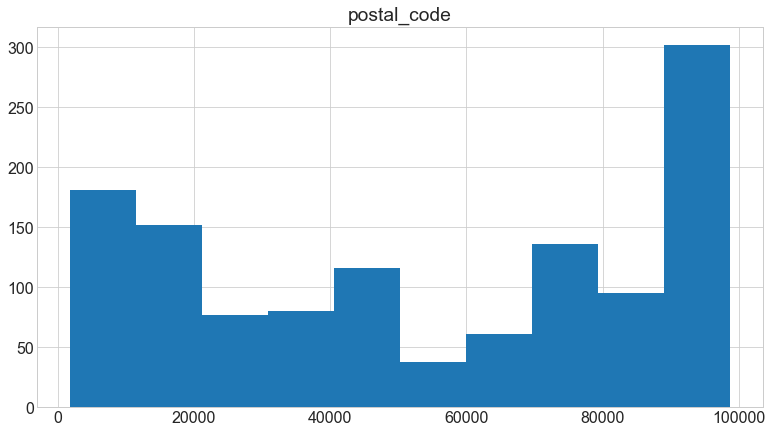

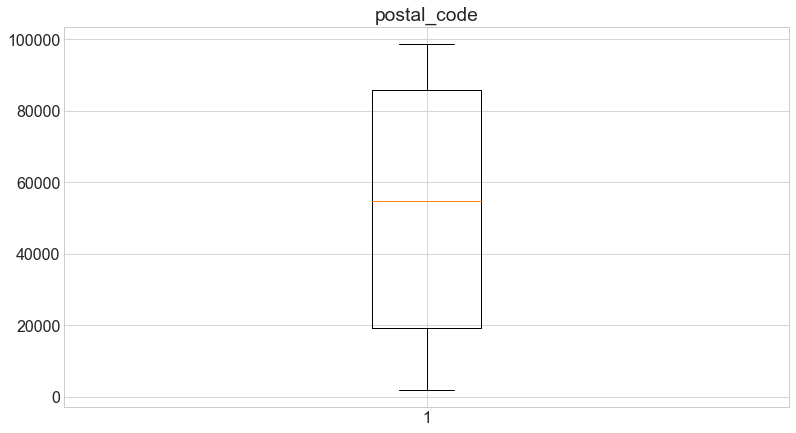

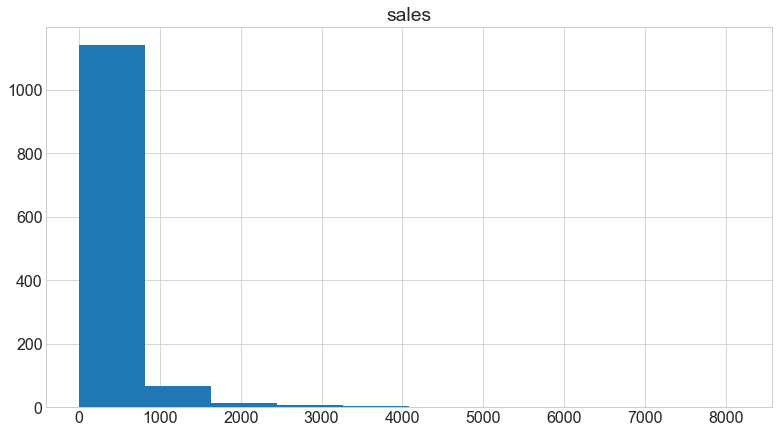

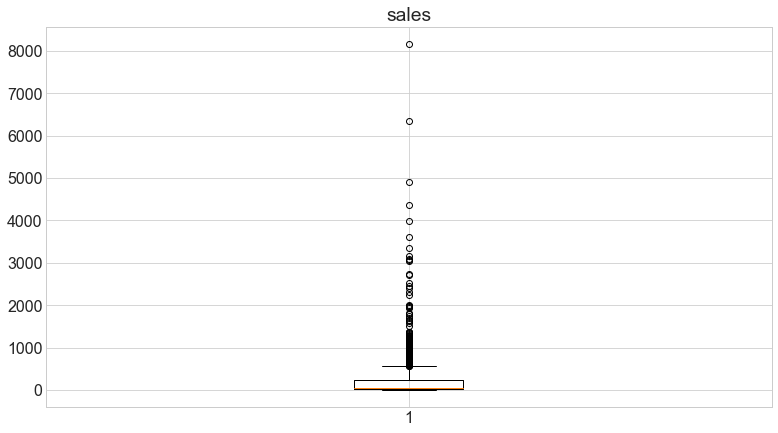

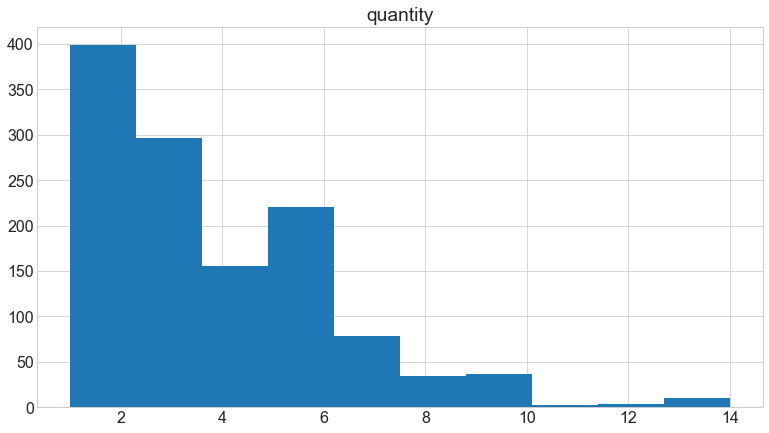

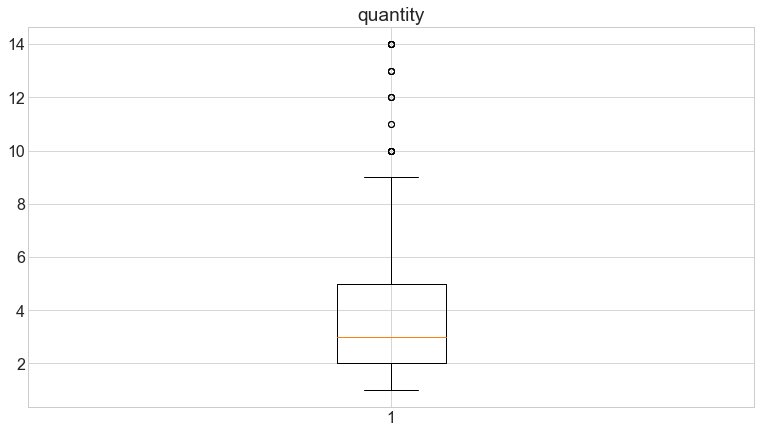

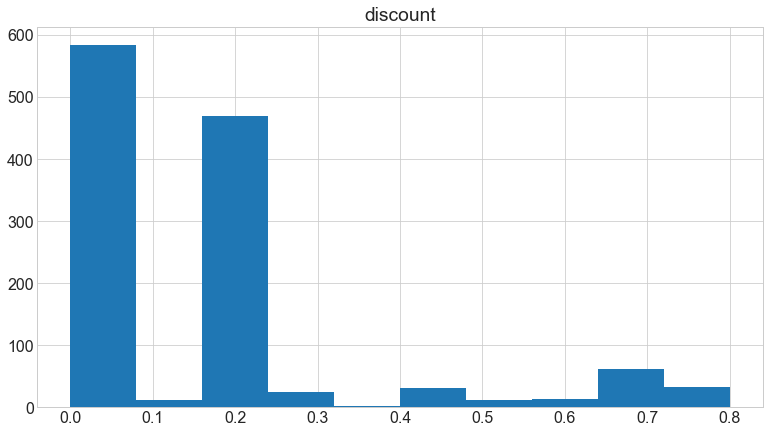

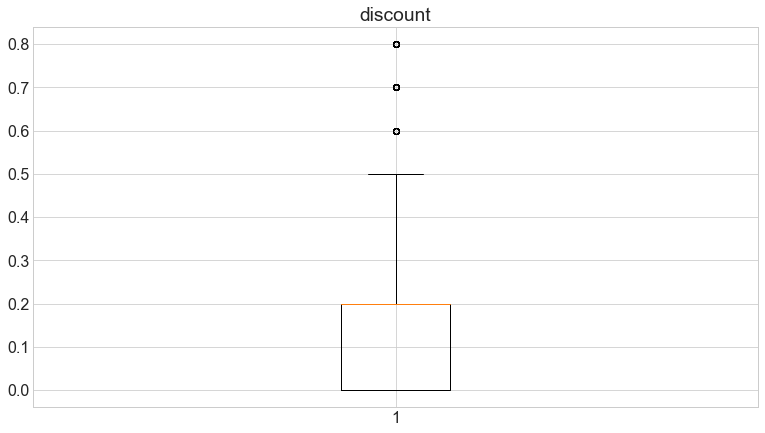

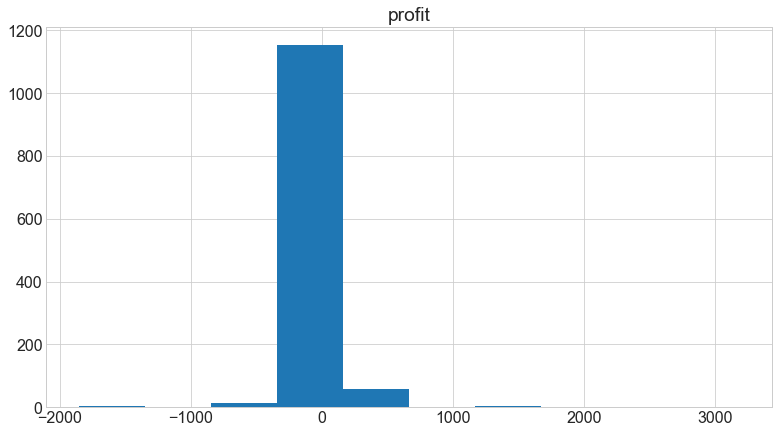

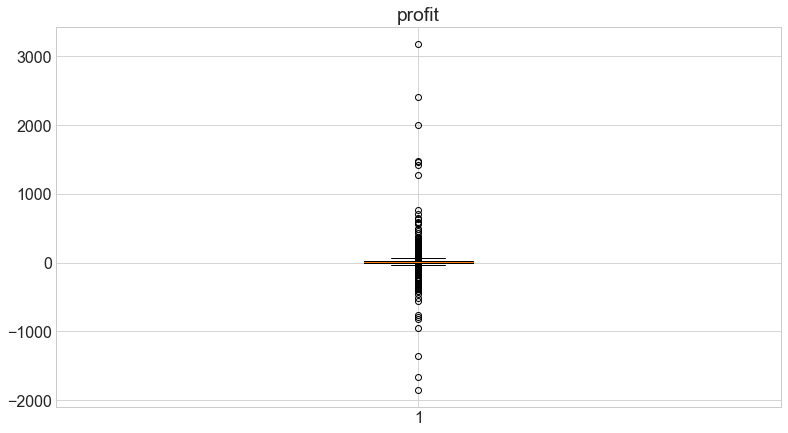

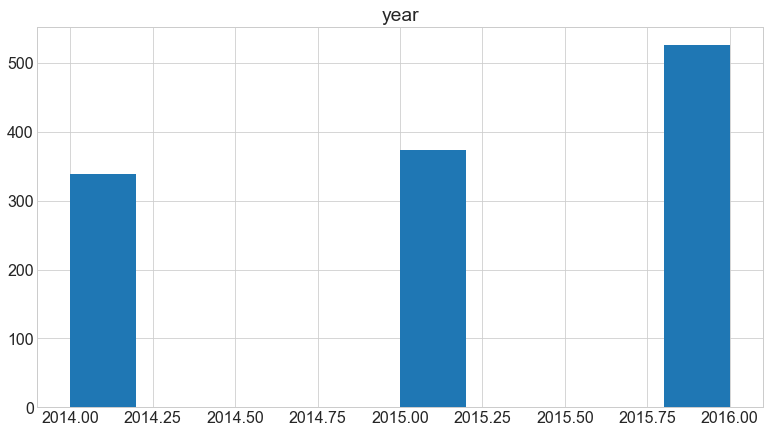

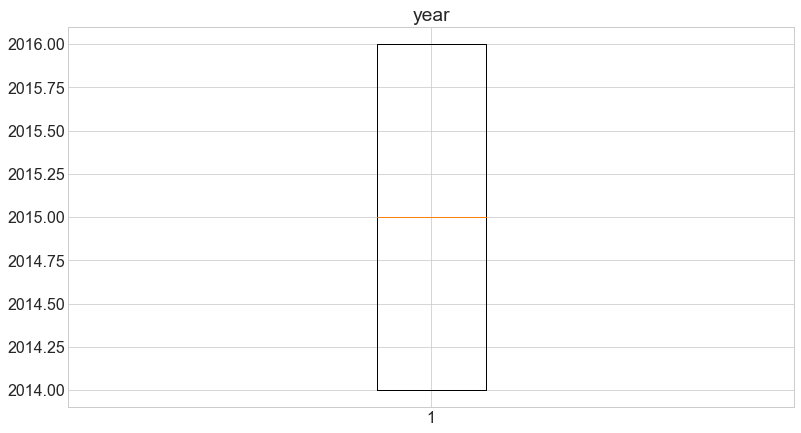

In [15]:
# Plot numeric columns
num_cols = train.columns[[(train[col].dtype == 'int64') or (train[col].dtype == 'float64') for col in train.columns]]

for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [110]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')


PRODUCT_ID
Count:
OFF-PA-10001970    7
TEC-AC-10003832    6
FUR-FU-10000010    6
OFF-ST-10001321    5
OFF-PA-10002377    4
                  ..
FUR-CH-10003817    1
TEC-CO-10002095    1
OFF-PA-10002947    1
OFF-ST-10002289    1
FUR-BO-10003441    1
Name: product_id, Length: 1112, dtype: int64


Proportions:
OFF-PA-10001970    0.004037
TEC-AC-10003832    0.003460
FUR-FU-10000010    0.003460
OFF-ST-10001321    0.002884
OFF-PA-10002377    0.002307
                     ...   
FUR-CH-10003817    0.000577
TEC-CO-10002095    0.000577
OFF-PA-10002947    0.000577
OFF-ST-10002289    0.000577
FUR-BO-10003441    0.000577
Name: product_id, Length: 1112, dtype: float64
--------------------------


CUSTOMER_ID
Count:
ZC-21910    16
JE-15745    15
NP-18325    15
RB-19795    13
BM-11140    13
            ..
TS-21085     1
JJ-15445     1
SC-20050     1
JH-16180     1
LM-17065     1
Name: customer_id, Length: 525, dtype: int64


Proportions:
ZC-21910    0.009227
JE-15745    0.008651
NP-18325    0.008651


In [114]:
train.columns.tolist()

['product_id',
 'customer_id',
 'order_id',
 'ship_date',
 'ship_mode',
 'segment',
 'city',
 'state',
 'postal_code',
 'sales',
 'quantity',
 'discount',
 'profit',
 'category',
 'sub_category',
 'customer_name',
 'product_name',
 'region_name',
 'days_bw_shipment',
 'month',
 'year']

In [17]:
train.category.value_counts()

Office Supplies    753
Furniture          253
Technology         232
Name: category, dtype: int64

In [115]:
df.head()

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,customer_name,product_name,region_name,days_bw_shipment,month,year
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,January,2014
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,January,2014
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,January,2014
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,January,2014
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,January,2014


In [25]:
y = train.profit

<AxesSubplot:ylabel='Frequency'>

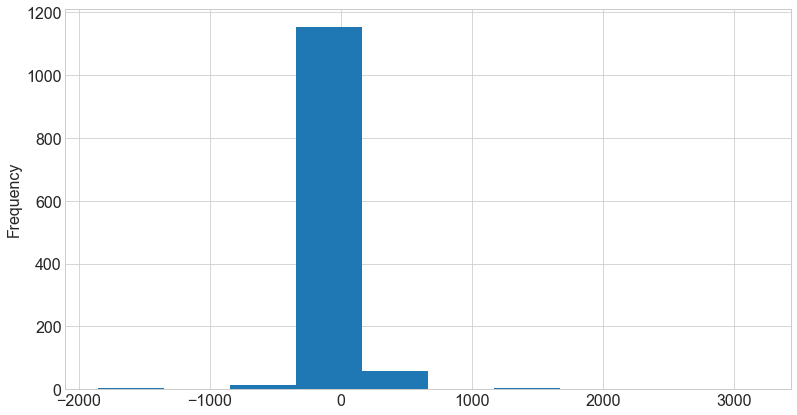

In [26]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Profit by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Profit')]

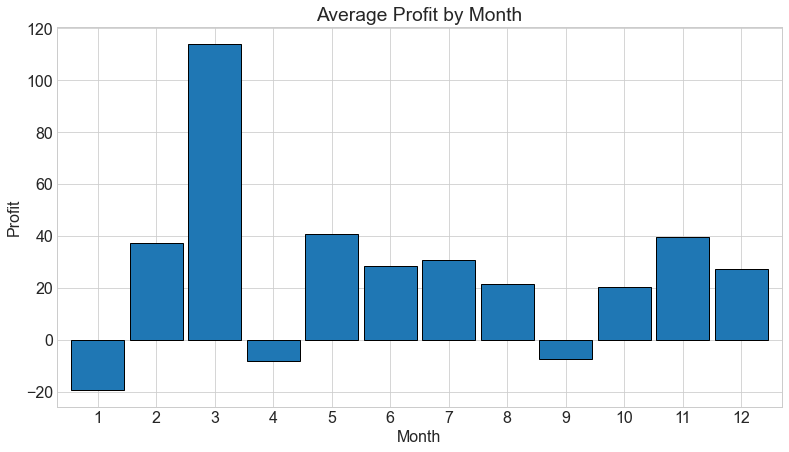

In [32]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Month', xlabel='Month', ylabel='Profit')


[Text(0.5, 1.0, 'Average Profit by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.200000000000003, 0.5, 'Profit')]

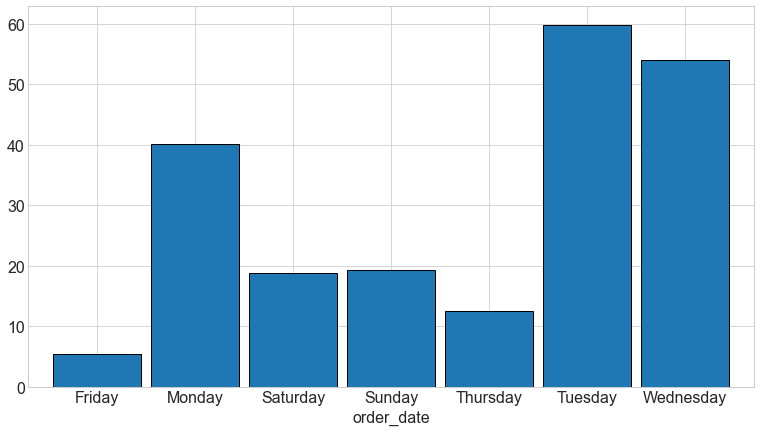

In [72]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Weekday', xlabel='Weekday', ylabel='Profit')


In [38]:
y2 = train.sales

[Text(0.5, 1.0, 'Average sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales')]

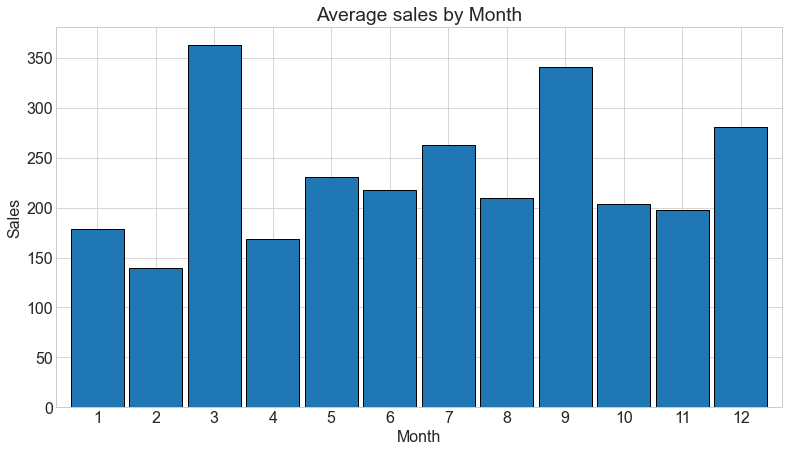

In [41]:
ax = y2.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by Month', xlabel='Month', ylabel='Sales')



In [59]:
quarter = train.resample('3M').sum() # Every 3 months


<AxesSubplot:xlabel='order_date'>

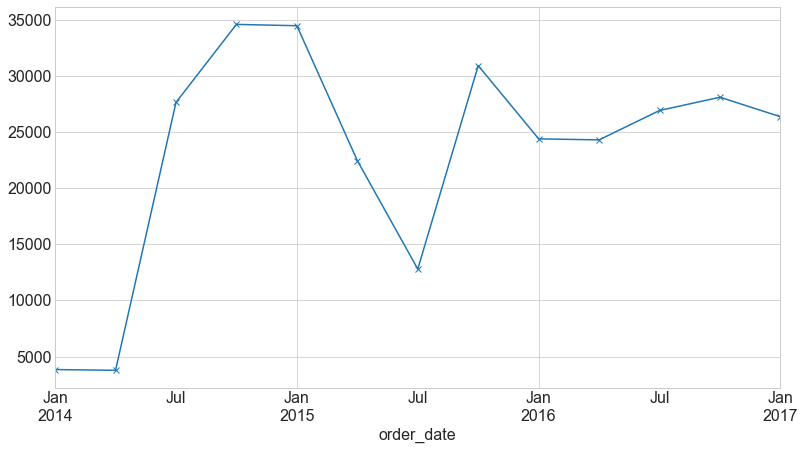

In [62]:
quarter.sales.plot(marker = 'x')

[Text(0.5, 1.0, 'Total Sales by Year'),
 Text(0.5, 0, 'year'),
 Text(0, 0.5, 'Sales')]

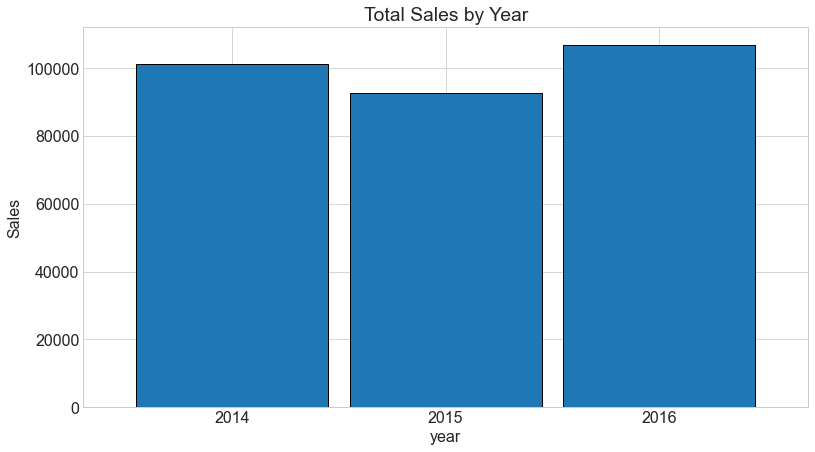

In [108]:
ax = y2.groupby(y2.index.year).sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Total Sales by Year', xlabel='year', ylabel='Sales')


<AxesSubplot:xlabel='category', ylabel='profit'>

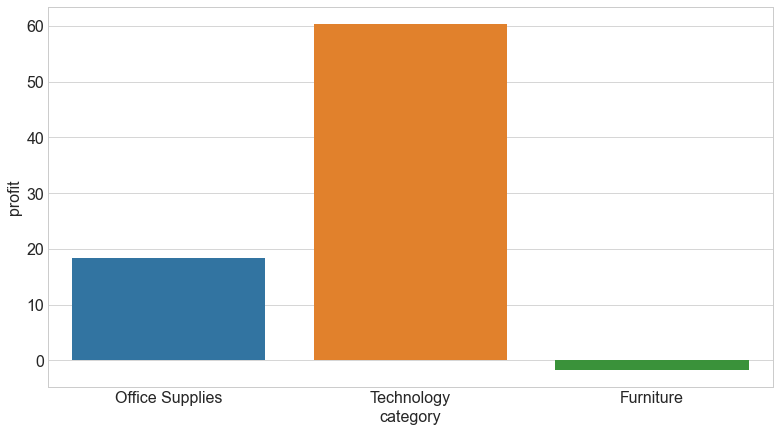

In [117]:
sns.barplot( data = df, x = 'category', y = 'profit', ci = None, estimator = np.mean)

In [ ]:
one sample t test
whether or not furniture is the average significantly smaller
for technology significantly larger

averageing by the order

# Hypothesis Testing

### - H0: Mean of furniture profit = Mean profit of all categories
### - Ha: Mean of furniture profit < Mean profit of all categories

In [120]:
alpha = .05

furniture_sample = df[df.category == 'Furniture'].profit
overall_mean = df.profit.mean()

t, p = stats.ttest_1samp(furniture_sample, overall_mean)

print(t, p/2, alpha)

-2.7378633733573694 0.003245994426706529 0.05


In [127]:
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t > 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

We reject the Null Hypothesis


### - H0: Mean of Technology profit = Mean profit of all categories
### - Ha: Mean of Technology profit > Mean profit of all categories

In [128]:
alpha = .05

furniture_sample = df[df.category == 'Technology'].profit
overall_mean = df.profit.mean()

t, p = stats.ttest_1samp(furniture_sample, overall_mean)

print(t, p/2, alpha)

1.9414310928961964 0.02654456320098377 0.05


In [130]:
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

We reject the Null Hypothesis


<AxesSubplot:xlabel='category', ylabel='sales'>

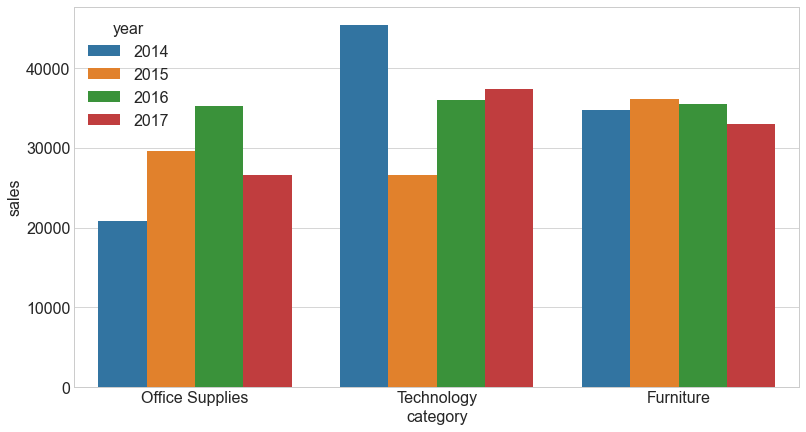

In [100]:
sns.barplot( data = df, x = 'category', y = 'sales', hue = 'year', ci = None, estimator = np.sum)

<AxesSubplot:xlabel='category', ylabel='profit'>

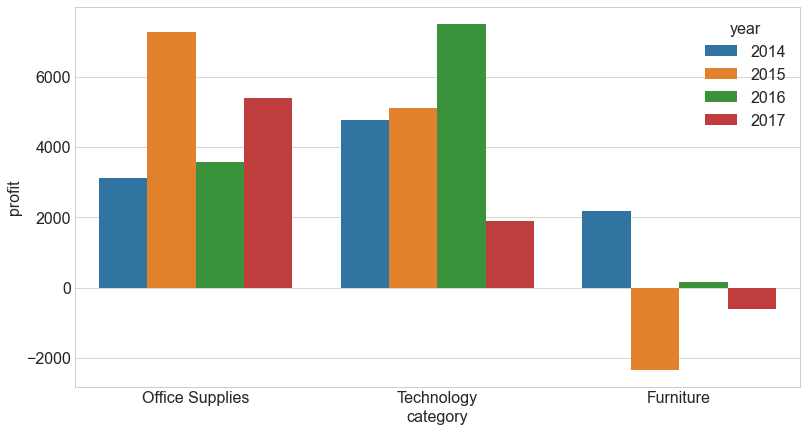

In [98]:
sns.barplot( data = df, x = 'category', y = 'profit', hue = 'year', ci = None, estimator = np.sum)

### We can see from the data that furniture sales have been steady over the past few years, but the profit has varied drastically
 
### On the flip side of that, our technological sales have varied over the past few years but the profit has had an positive return
 
#### - Based on what we see, Office supplies has a consistent ROI, technology has shown an upward climb, furniture has had questionable ROI with two negative years

<AxesSubplot:xlabel='category', ylabel='sales'>

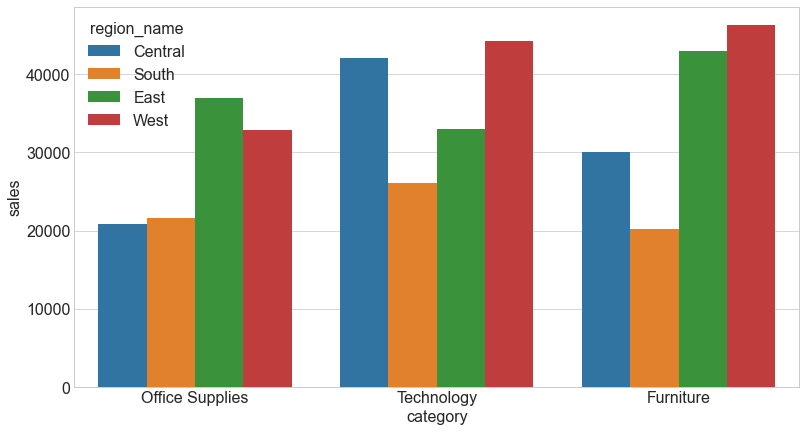

In [106]:
sns.barplot( data = df, x = 'category', y = 'sales', hue = 'region_name', ci = None, estimator = np.sum)

<AxesSubplot:xlabel='category', ylabel='profit'>

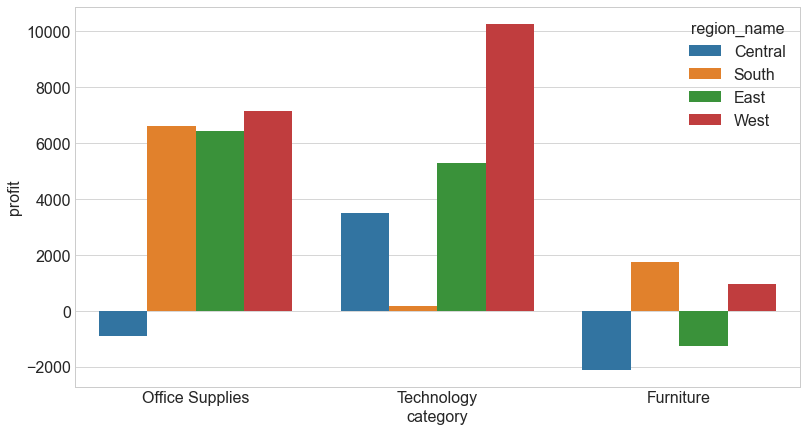

In [107]:
sns.barplot( data = df, x = 'category', y = 'profit', hue = 'region_name', ci = None, estimator = np.sum)